In [1]:
from brian2 import *
%matplotlib inline
prefs.codegen.target = "numpy"

In [2]:
20*volt
1000*amp
1e6*volt
1000*namp
10*nA * 5*Mohm

50. * mvolt

In [4]:
start_scope()
tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''
G = NeuronGroup(1, eqs, method='exact')
print('Before v = %s' % G.v[0])
run(100*ms)
print('After v = %s' % G.v[0])
print('Expected value of v = %s' % (1-exp(-100*ms/tau)))

Before v = 0.0
After v = 0.9999546000702376
Expected value of v = 0.9999546000702375


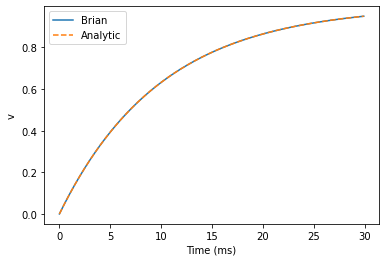

In [7]:
start_scope()
tau = 10*ms
eqs = '''
dv/dt = (1-v)/tau : 1
'''
G = NeuronGroup(1, eqs, method='exact')
M = StateMonitor(G, 'v', record=True)
run(30*ms)

plot(M.t/ms, M.v[0], 'C0', label='Brian')
plot(M.t/ms, 1-exp(-M.t/tau), 'C1--', label='Analytic')
xlabel('Time (ms)')
ylabel('v')
legend();